## 6.5 Unsupervised Machine Learning: Clustering - Milena Nedyalkova

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# File path and name
data_path = r'C:\\Users\\PC\\Desktop\\CareerFoundry Data Analytics\\airport_traffic_2024_clean.csv'
data = pd.read_csv(data_path)

In [3]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month Code', 'Month', 'Flight Date',
       'Airport ICAO Code', 'Airport Name', 'Country', 'Number of Departures',
       'Number of Arrivals', 'Total flights'],
      dtype='object')

In [5]:
data.head(5)

,Unnamed: 0,Year,Month Code,Month,Flight Date,Airport ICAO Code,Airport Name,Country,Number of Departures,Number of Arrivals,Total flights
0,0,2024,1,JAN,2024-01-01,LATI,Tirana,Albania,73,74,147
1,1,2024,1,JAN,2024-01-01,UDYZ,Yerevan,Armenia,52,48,100
2,2,2024,1,JAN,2024-01-01,LOWG,Graz,Austria,6,8,14
3,3,2024,1,JAN,2024-01-01,LOWI,Innsbruck,Austria,22,25,47
4,4,2024,1,JAN,2024-01-01,LOWK,Klagenfurt,Austria,2,2,4


In [6]:
# Drop the unnecessary columns

data = data.drop(columns=['Unnamed: 0', 'Year' , 'Month', 'Airport ICAO Code' , 'Airport Name', 'Country', 'Flight Date'])

In [7]:
data.shape

(114754, 4)

In [8]:
data.dtypes

Month Code              int64
Number of Departures    int64
Number of Arrivals      int64
Total flights           int64
dtype: object

In [9]:
# Check for missing values

data.isnull().sum()

Month Code              0
Number of Departures    0
Number of Arrivals      0
Total flights           0
dtype: int64

In [10]:
# Check for duplicates

dups = data.duplicated()  # No duplicates found
dups.shape

(114754,)

### 2. The elbow technique

In [11]:
# Define the range of potential clusters in the data.

num_cl = range(1, 10) 

In [12]:
# Define k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))] 
score

[-10137777903.813892,
 -2910535154.1864996,
 -1410182369.4471955,
 -646693659.454899,
 -429117127.00258017,
 -294656066.7171967,
 -213751391.92177755,
 -166285317.32191885,
 -134472367.02265707]

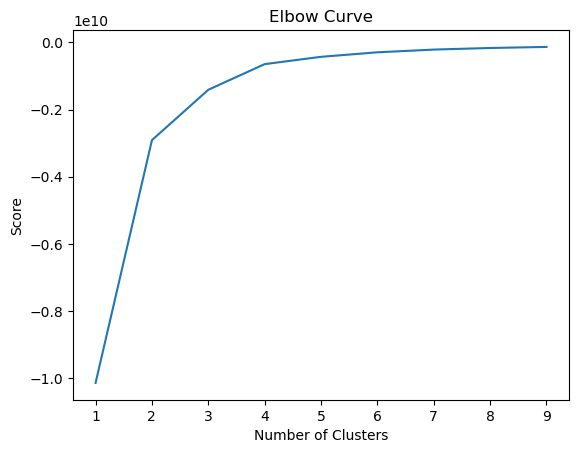

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.savefig("Elbow curve.png", dpi=300, bbox_inches="tight")

pl.show()

#####  In the data set there's a large jump from 2 to 4 on the x-axis, but after that, the curve straightens out. The optimal count for our clusters is 4.

### 3. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(data)

KMeans(n_clusters=4)

In [17]:
data['clusters'] = kmeans.fit_predict(data)

In [18]:
data.head(5)

,Month Code,Number of Departures,Number of Arrivals,Total flights,clusters
0,1,73,74,147,3
1,1,52,48,100,1
2,1,6,8,14,1
3,1,22,25,47,1
4,1,2,2,4,1


In [19]:
data['clusters'].value_counts()

clusters
1    80486
3    23253
0     7881
2     3134
Name: count, dtype: int64

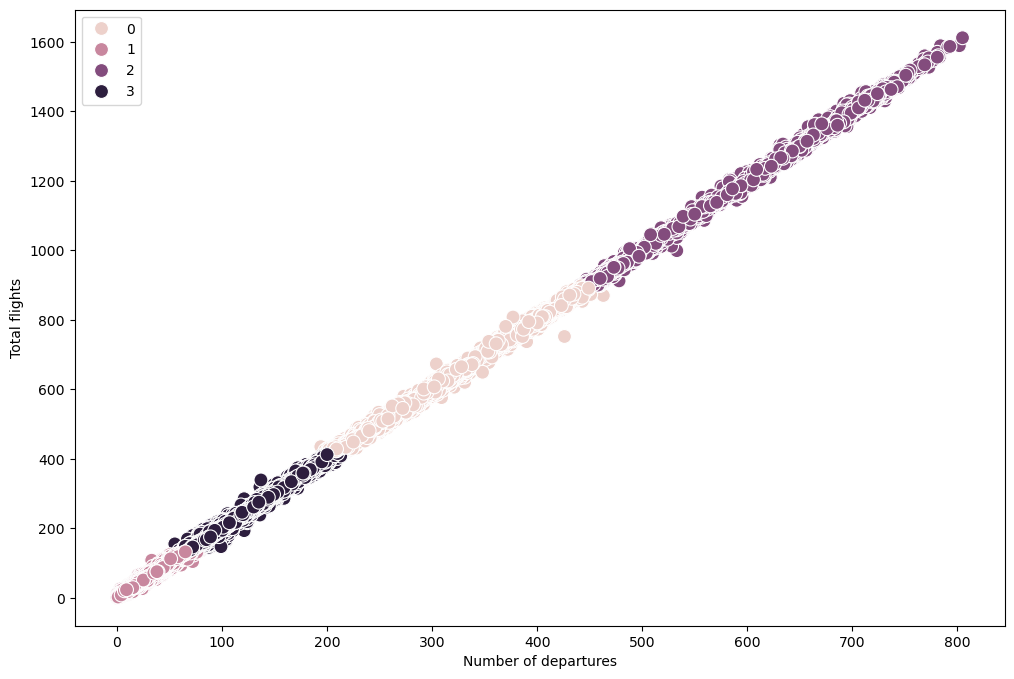

In [24]:
# Plot the clusters for the "Number of departures" and "Total flights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['Number of Departures'], y=data['Total flights'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of departures') 
plt.ylabel('Total flights') 

plt.savefig("clusters_departures_vs_flights.png", dpi=300, bbox_inches="tight")

plt.show()

In [21]:
data.loc[data['clusters'] == 3, 'cluster'] = 'dark purple'
data.loc[data['clusters'] == 2, 'cluster'] = 'purple'
data.loc[data['clusters'] == 1, 'cluster'] = 'mauve'
data.loc[data['clusters'] == 0, 'cluster'] = 'light pink'

In [22]:
data.groupby('cluster').agg({'Number of Arrivals':['mean', 'median'], 
                         'Number of Departures':['mean', 'median'], 
                         'Total flights':['mean', 'median']})

Number of Arrivals        Number of Departures         \
                          mean median                 mean median   
cluster                                                             
dark purple         117.441663  109.0           117.309293  109.0   
light pink          303.171044  298.0           303.221799  299.0   
mauve                16.287255    9.0            16.244353    9.0   
purple              596.681876  605.0           596.658583  605.0   

            Total flights          
                     mean  median  
cluster                            
dark purple    234.750957   218.0  
light pink     606.392844   596.0  
mauve           32.531608    18.0  
purple        1193.340459  1208.0

### The clustering results show clear groupings of airports based on flight traffic. The dark purple cluster ('3') represents major international hubs with very high departures and arrivals. The mauve and purple clusters ('1' and '2') represent regional airports with moderate traffic, while the light pink cluster ('0') includes low-traffic airports. These clusters make sense because airports naturally differ in traffic volume, and the algorithm has captured these differences.It would be interesting to separate the busiest airports from the rest and compare the differences between the two groups.
